# **I. INTRODUCTION**

```
=================================================================================================================================================

Milestone 2 Phase 1 FTDS Hacktiv8

Name : Yosef Feriyanto

Batch : HCK-007

The objectifity of this project is to predict wether the water is SAFE or NOT by considering it's content

=================================================================================================================================================

```

Kaggle:         https://www.kaggle.com/datasets/mssmartypants/water-quality?resource=download

Huggingface:    https://huggingface.co/spaces/yosefferiyanto/Water_Prediction_Milestone_2_Hacktiv8/tree/main

## PROBLEM STATEMENT

Saya adalah seorang *`data scientist`* yang ditugaskan oleh **Kementerian Lingkungan Hidup dan Kehutanan** (`KLHK`) untuk mengembangkan dan menganalisa model klasifikasi yang bertujuan untuk menciptakan model yang dapat memprediksi apakah suatu lingkungan air aman atau tidak, berdasarkan kandungan unsur, senyawa, mikroba, dan virus dalam air. Model ini nantinya akan sangat membantu dalam pengambilan keputusan terkait kelayakan suatu sumber air untuk digunakan, sehingga dapat mencegah penyebaran penyakit yang disebabkan oleh air yang terkontaminasi dari data yang didapat.

*I am a `data scientist` assigned by the **Ministry of Environment and Forestry** (`KLHK`) to develop and analyze a classification model which aims to create a model that can predict whether a water environment is safe or not, based on the content of elements, compounds, microbes and viruses in water. This model will be very helpful in making decisions regarding the suitability of a water source for use, so that it can prevent the spread of disease caused by contaminated water from the data obtained.*

## DATA INTRODUCTION

Data yang digunakan merupakan klasifikasi apakah suatu lingkungan air aman atau tidak dilihat dari kandungan unsur, senyawa, mikroba, dan virus yang ada didalamnya. Semua satuan kandungan unsur dan senyawa dalam dataset ini menggunakan ppm atau *part per milion*, bakteri menggunakan CFU/mL atau *colony forming unit*, dan virus menggunakan PFU/mL atau *plaque forming unit*.

Dapat dilihat bahwa *upper limit* dari CFU/mL dan PFU/mL adalah 0, bukan berarti jika ada satu *cell* bakteri atau virus dalam badan air maka akan langsung masuk tidak aman. CFU/mL sendiri merepresentasikan bakteri membuat satu koloni dalam satu mililiter dan PFU/mL merepresentasikan virus membuat 'plak' dalam satu mililiter air. Bisa diartikan mungkin ada kandungan bakteri dan virus tapi belum tentu dapat membuat koloni atau plak.

*The data used is a classification of whether a water environment is safe or not based on the content of elements, compounds, microbes and viruses in it. All elements and compound content units in this dataset use ppm or parts per million, bacteria using CFU/mL or colony forming unit, and viruses using PFU/mL or plaque forming unit.*

*It can be seen that the upper limit of CFU/mL and PFU/mL is 0, which does not mean that if there is one cell of bacteria or viruses in a body of water it will immediately become unsafe. CFU/mL itself represents bacteria making one colony in one milliliter and PFU/mL represents viruses making 'plaque' in one milliliter of water. This could mean that there may be bacteria and viruses present but not necessarily that they can create colonies or plaques.*

### Advantage & Limitation

`Advantage`

Semua nilai dalam data merupakan numerikal kecuali pada kolom targetnya, jadi *preprocessing* data hanya membutuhkan *scaling*. Jumlah data juga cukup banyak (7999 baris) memungkinkan akurasi model yang dibuat karena banyak data untuk dilatih dan diuji.

*All values in the data are numeric except for the target column, so preprocessing the data only requires scaling. The amount of data is also quite large (7999 rows), allowing the accuracy of the model created because there is a lot of data to train and test.*

`Limitation`

Kelas kategori biner (0 & 1) dalam kolom target tidak seimbang, yaitu 1:8 dimana kategori 1 (aman) menjadi kategori minoritas, memungkinkan model yang dibuat kurang bisa memprediksi kategori aman.

*The binary category classes (0 and 1) in the target column are unbalanced, namely 1:8 where category 1 (safe) is a minority category, allowing the model to be less able to predict the safe category.*

### Data Source

https://www.kaggle.com/datasets/mssmartypants/water-quality?resource=download

|**COLUMN**|**EXPLAINATION**|**UPPER LIMIT**|
|:--------:|---------------:|:--------------|
|`aluminium`|Level of aluminium in water per liter|2.8 ppm|
|`ammonia`|Level of ammonia in water per liter|32.5 ppm|
|`arsenic`|Level of arsenic in water per liter|0.01 ppm|
|`barium`|Level of barium in water per liter|2 ppm|
|`cadmium`|Level of cadmium in water per liter|0.005 ppm|
|`chloramine`|Level of chloramine in water per liter|4 ppm|
|`chromium`|Level of chromium in water per liter|0.1 ppm|
|`copper`|Level of copper in water per liter|1.3 ppm|
|`flouride`|Level of flouride in water per liter|1.5 ppm|
|`lead`|Level of lead in water per liter|0.015 ppm|
|`nitrates`|Level of nitrates in water per liter|10 ppm|
|`nitrites`|Level of nitrites in water per liter|1 ppm|
|`mercury`|Level of mercury in water per liter|0.002 ppm|
|`perchlorate`|Level of perchlorate in water per liter|56 ppm|
|`radium`|Level of radium in water per liter|5 ppm|
|`selenium`|Level of selenium in water per liter|0.5 ppm|
|`silver`|Level of silver in water per liter|0.1 ppm|
|`uranium`|Level of uranium in water per liter|0.3 ppm|
|`bacteria`|Level of bacteria in water per mililiter|0 CFU|
|`viruses`|Level of viruses in water per mililiter|0 PFU|
|`is_safe`|0: Not Safe & 1: Safe||

**`LEGENDS`**

- `ppm`: Part per million (*1 ppm meaning there's 1 mg per L or kg*)

- `CFU`: Colony forming unit (*a cell or spore that can grow and form a "colony" of bacteria or microorganisms*)

- `PFU`: Plaque forming unit (*one virus particle that can form a "plaque" or virus colony*)

Source

`PFU`
https://en.wikipedia.org/wiki/Virus_quantification#:~:text=The%20PFU%2FmL%20number%20represents,by%20one%20infectious%20virus%20particle.

`CFU`
https://www.researchgate.net/figure/Average-concentration-of-bacteria-in-water-colony-forming-unit-CFU-mL-1_tbl1_340863006#:~:text=by%20Muhammad%20Arslan-,Average%20concentration%20of%20bacteria%20in%20water%20(colony%20forming%20unit,CFU)%20mL%20%E2%88%921%20.

## OBJECTIVES

### Scoring

Tujuan dari proyek ini adalah untuk mengembangkan model klasifikasi yang mampu meminimalisir '`false negatives`', yang dalam konteks ini berarti mengidentifikasi secara salah suatu sumber air sebagai aman ketika sebenarnya tidak, sehingga mencegah penyebaran penyakit yang disebabkan oleh air terkontaminasi. Oleh karena itu, saya akan menggunakan '`recall`' sebagai metrik evaluasi utama karena ini akan mengoptimalkan identifikasi kasus-kasus positif yang sebenarnya (sumber air yang benar-benar tidak aman) dan dengan demikian membantu dalam mencegah potensi risiko kesehatan lingkungan masyarakat.

*The aim of this project is to develop a classification model capable of minimizing '`false negatives`', which in this context means falsely identifying a water source as safe when it is not, thereby preventing the spread of disease caused by contaminated water. Therefore, I will use '`recall`' as the main evaluation metric as this will optimize the identification of true positive cases (truly unsafe water sources) and thereby help in preventing potential environmental public health risks.*

### Model

Model yang akan saya gunakan adalah '`Random Forest`' karena memiliki performa yang baik dalam mengelola data besar, dapat menangani fitur kategorikal dan numerik.

*The model I will use is '`Random Forest`' because it has good performance in managing big data, it can handle categorical and numeric features.*

### AUC Score

*AUC Score more than 0.5 or even close to 1.0*

# **II. LIBRARIES**

In [38]:
# Data exploration
import pandas as pd

# Imbalance Handling
from imblearn.over_sampling import SMOTE

# Numeric computation
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import phik

# Model save & load
import ast
import pickle
from imblearn.pipeline import Pipeline

# Distribution data
from scipy.stats import skew

# Split
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from feature_engine.outliers import Winsorizer

# Models 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

# Hyperparameter tuning 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Model eval
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,f1_score, accuracy_score,precision_score,recall_score,make_scorer
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score, precision_recall_curve, auc, average_precision_score

# Time
import time

# Ignore warning
import warnings 
warnings.filterwarnings('ignore')

# **III. DATA LOADING**

## LOADING DATA FROM LOCAL FILE

In [39]:
data = pd.read_csv('waterQuality1.csv')
data

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


*OG data consist of 7999 rows in 21 columns*

## DISPLAY TOP & BOTTOM 10 DATA BY ORDER

In [40]:
print('Top 10 Data by Order')
display(data.head(10))
print('')
print('Bottom 10 Data by Order')
display(data.tail(10))

Top 10 Data by Order


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,0.67,...,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1
6,2.36,5.6,0.01,1.35,0.004,1.28,0.62,1.88,0.33,0.13,...,0.021,18.60,1.78,0.007,45.34,2.84,0.10,0.24,0.08,0
7,3.93,19.87,0.04,0.66,0.001,6.22,0.10,1.86,0.86,0.16,...,0.197,13.65,1.81,0.001,53.35,7.24,0.08,0.08,0.07,0
8,0.60,24.58,0.01,0.71,0.005,3.14,0.77,1.45,0.98,0.35,...,0.167,14.66,1.84,0.004,23.43,4.99,0.08,0.25,0.08,1
9,0.22,16.76,0.02,1.37,0.007,6.40,0.49,0.82,1.24,0.83,...,0.109,4.79,1.46,0.010,30.42,0.08,0.03,0.31,0.01,1



Bottom 10 Data by Order


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7989,0.01,27.73,0.06,0.77,0.09,0.20,0.03,0.00,0.58,0.0,...,0.112,11.74,1.0,0.007,7.58,7.21,0.07,0.04,0.09,0
7990,0.00,3.11,0.07,1.24,0.07,0.06,0.03,0.04,0.74,0.0,...,0.016,15.15,1.0,0.005,0.46,6.24,0.03,0.09,0.05,0
7991,0.03,8.94,0.02,1.25,0.08,0.22,0.02,0.05,0.71,0.0,...,0.112,11.97,1.0,0.001,7.18,1.73,0.00,0.04,0.06,1
7992,0.04,10.84,0.06,0.49,0.04,0.08,0.03,0.08,0.49,0.0,...,0.151,14.44,1.0,0.003,0.34,2.16,0.06,0.03,0.05,1
7993,0.02,5.24,0.05,0.77,0.02,0.57,0.04,0.03,0.15,0.0,...,0.085,19.41,1.0,0.001,1.68,3.55,0.05,0.07,0.07,1
7994,0.05,7.78,0.00,1.95,0.04,0.10,0.03,0.03,1.37,0.0,...,0.197,14.29,1.0,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.01,0.45,0.02,0.02,1.48,0.0,...,0.031,10.27,1.0,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.03,0.05,0.05,0.02,0.91,0.0,...,0.182,15.92,1.0,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.00,2.00,0.00,0.09,0.00,0.0,...,0.000,0.00,0.0,0.000,0.00,0.00,0.00,0.00,0.00,1
7998,0.04,6.85,0.01,0.70,0.03,0.05,0.01,0.03,1.00,0.0,...,0.182,15.92,1.0,0.000,1.35,4.84,0.00,0.04,0.05,1


# **IV. EXPLORATORY DATA ANALYSIS (EDA)**

## EDA for ANALYSIS

In [41]:
# Will use `df_eda` for analysis EDA
df_eda = data.copy()

### Basic & Descriptive

In [42]:
print('Basic')
display(df_eda.info())
print('Descriptive')
display(df_eda.describe().T)

Basic
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  

None

Descriptive


,count,mean,std,min,25%,50%,75%,max
aluminium,7999.0,0.666158,1.265145,0.0,0.040,0.070,0.280,5.05
arsenic,7999.0,0.161445,0.252590,0.0,0.030,0.050,0.100,1.05
barium,7999.0,1.567715,1.216091,0.0,0.560,1.190,2.480,4.94
cadmium,7999.0,0.042806,0.036049,0.0,0.008,0.040,0.070,0.13
chloramine,7999.0,2.176831,2.567027,0.0,0.100,0.530,4.240,8.68
chromium,7999.0,0.247226,0.270640,0.0,0.050,0.090,0.440,0.90
copper,7999.0,0.805857,0.653539,0.0,0.090,0.750,1.390,2.00
flouride,7999.0,0.771565,0.435373,0.0,0.405,0.770,1.160,1.50
bacteria,7999.0,0.319665,0.329485,0.0,0.000,0.220,0.610,1.00
viruses,7999.0,0.328583,0.378096,0.0,0.002,0.008,0.700,1.00


*Still there is no `ammonia` & `is_safe` because these two are object type, not numerical.*

### Value in Target

In [43]:
df_eda['is_safe'].value_counts()

is_safe
0        7084
1         912
#NUM!       3
Name: count, dtype: int64

*There is 3 `#NUM!` value in `is_safe` column, I will include them into 1 category since 1 is extremely minor to 0.*

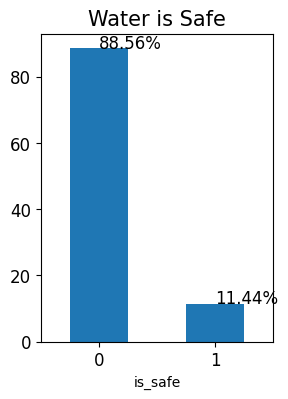

In [44]:
# Replace `#NUM!` to missing value or nan
df_eda = df_eda.replace('#NUM!', np.nan)

# Replace nan to 1 (because just 3 & 1 is minor)
df_eda = df_eda.fillna(1)

# Change `ammonia` & `is_safe` column type to integer
df_eda = df_eda.astype({'ammonia':float,'is_safe':int})

# Plotbar for 0 and 1 label in `is_safe`
def_count = (df_eda.is_safe.value_counts(normalize=True)*100)
def_count.plot.bar(figsize=(3,4))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Water is Safe", fontsize=15)
for x,y in zip([0,1],def_count):
    plt.text(x, y, '{:.2f}%'.format(y), fontsize=12)
plt.show()

**`LEGENDS`**

`0` Not Safe

`1` Safe

### Display Basic Information Again

In [45]:
print('Basic')
display(df_eda.info())
print('Descriptive')
display(df_eda.describe().T)

Basic
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   float64
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  

None

Descriptive


,count,mean,std,min,25%,50%,75%,max
aluminium,7999.0,0.666158,1.265145,0.00,0.040,0.070,0.280,5.05
ammonia,7999.0,14.273232,8.880987,-0.08,6.560,14.130,22.130,29.84
arsenic,7999.0,0.161445,0.252590,0.00,0.030,0.050,0.100,1.05
barium,7999.0,1.567715,1.216091,0.00,0.560,1.190,2.480,4.94
cadmium,7999.0,0.042806,0.036049,0.00,0.008,0.040,0.070,0.13
chloramine,7999.0,2.176831,2.567027,0.00,0.100,0.530,4.240,8.68
chromium,7999.0,0.247226,0.270640,0.00,0.050,0.090,0.440,0.90
copper,7999.0,0.805857,0.653539,0.00,0.090,0.750,1.390,2.00
flouride,7999.0,0.771565,0.435373,0.00,0.405,0.770,1.160,1.50
bacteria,7999.0,0.319665,0.329485,0.00,0.000,0.220,0.610,1.00


*Now we could see `ammonia` & `is_safe` column.*

### Distribution

#### Violin Plot

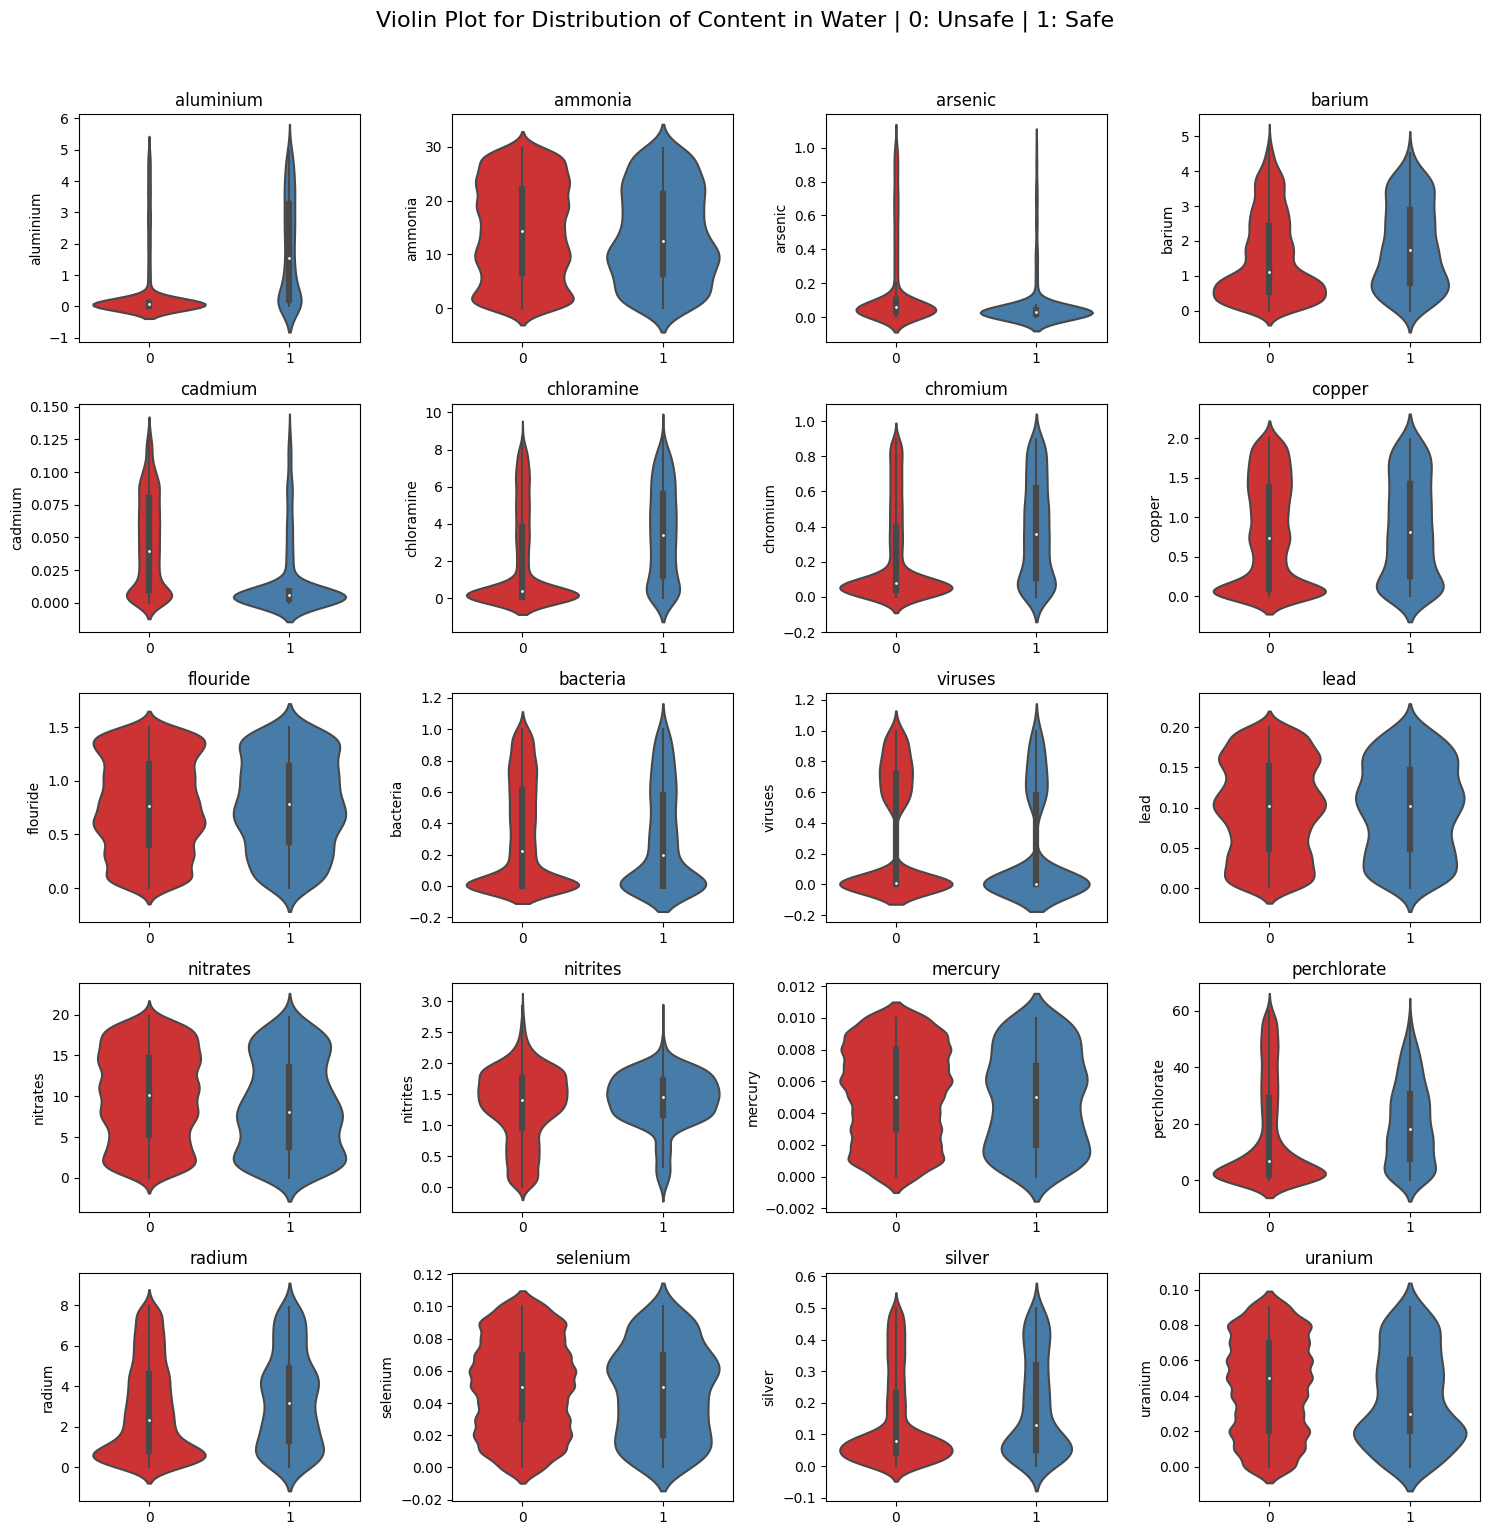

In [46]:
columns_to_plot = df_eda.columns.tolist()
columns_to_plot.remove('is_safe')

num_rows = 5
num_cols = 4

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))

for i, col in enumerate(columns_to_plot):
    row_index = i // num_cols
    col_index = i % num_cols
    sns.violinplot(data=df_eda, x='is_safe', y=col, ax=axes[row_index, col_index], palette="Set1")
    axes[row_index, col_index].set_title(col)
    axes[row_index, col_index].set_xlabel('')
    
plt.suptitle("Violin Plot for Distribution of Content in Water | 0: Unsafe | 1: Safe", y=1.02, fontsize=16)

plt.tight_layout()
plt.show()

#### Box Plot

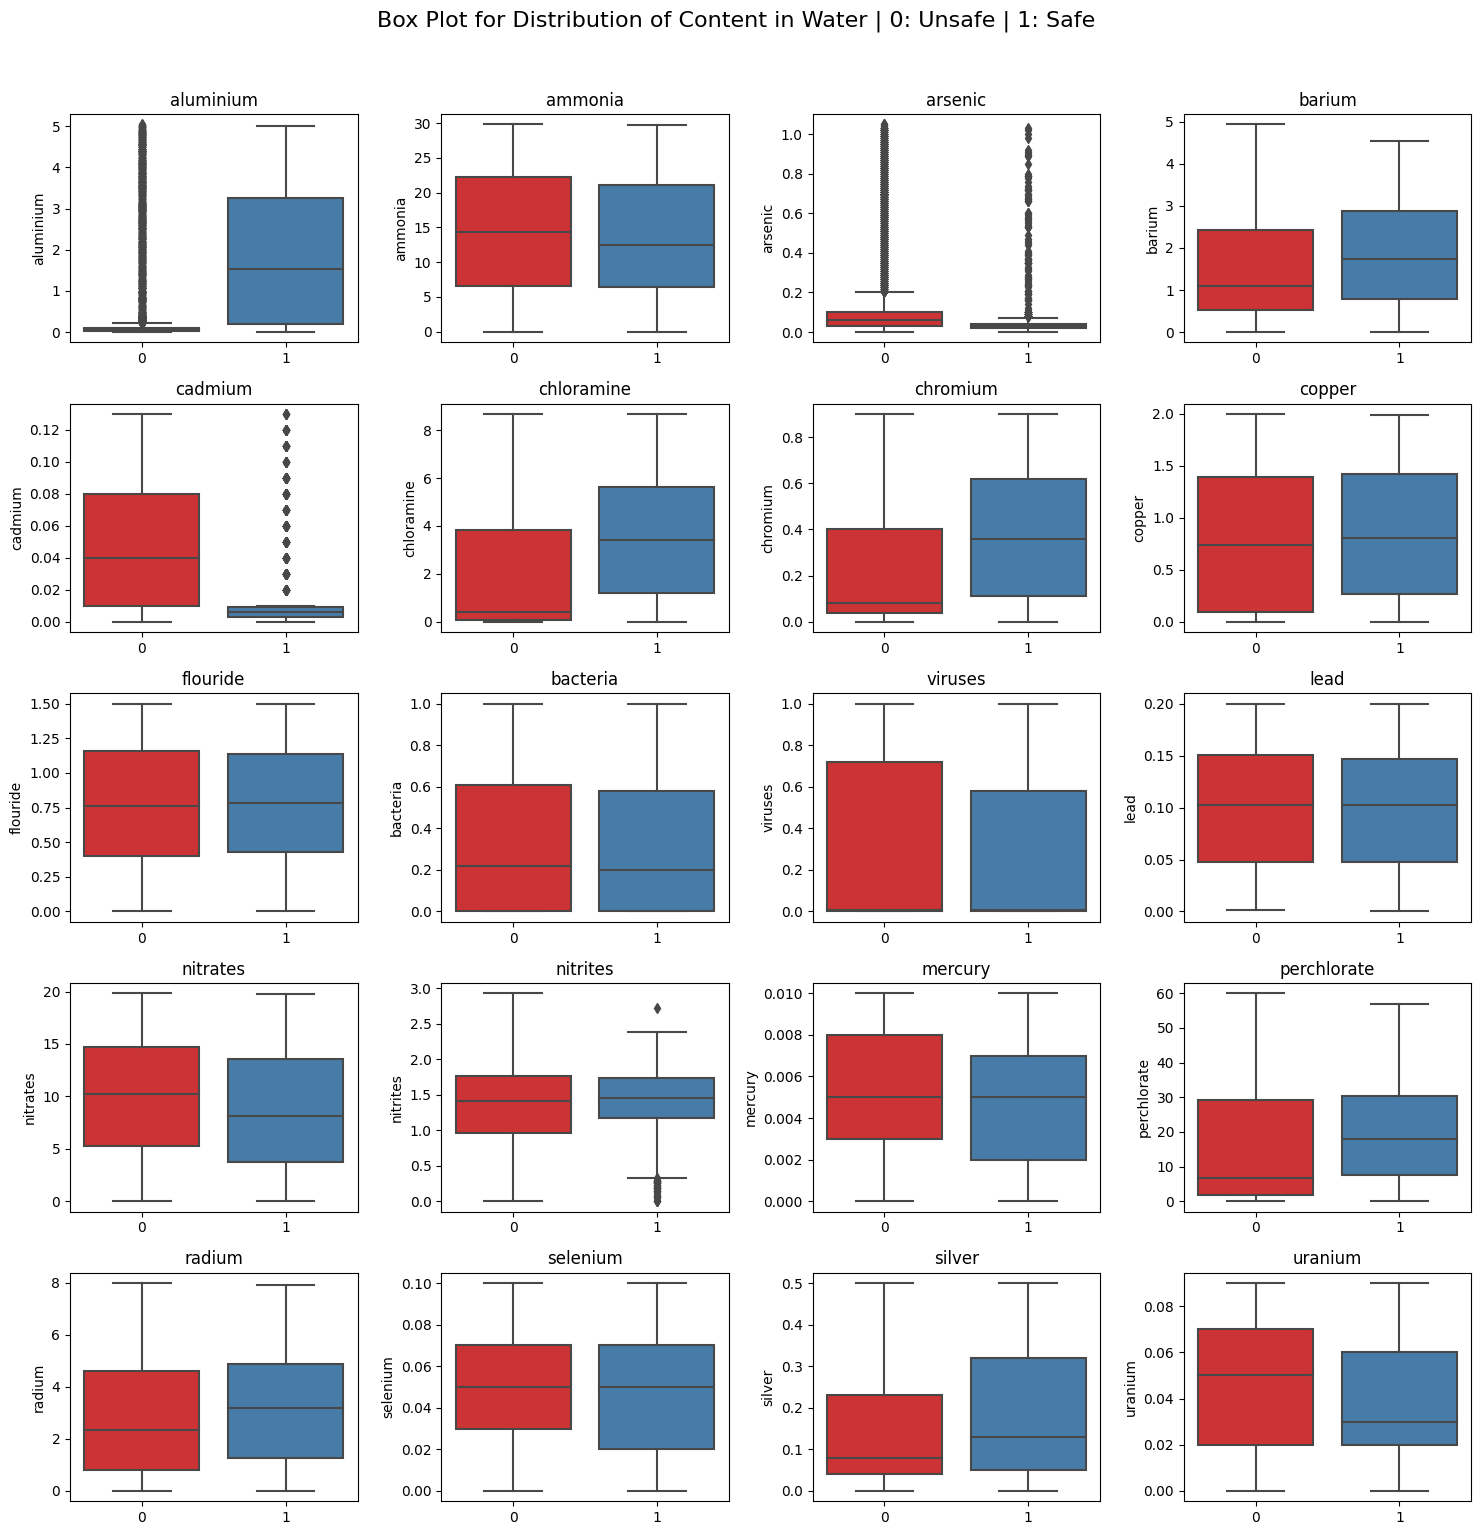

In [47]:
columns_to_plot = df_eda.columns.tolist()
columns_to_plot.remove('is_safe')

num_rows = 5
num_cols = 4

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))

for i, col in enumerate(columns_to_plot):
    row_index = i // num_cols
    col_index = i % num_cols
    sns.boxplot(data=df_eda, x='is_safe', y=col, ax=axes[row_index, col_index], palette="Set1")
    axes[row_index, col_index].set_title(col)
    axes[row_index, col_index].set_xlabel('')
    
plt.suptitle("Box Plot for Distribution of Content in Water | 0: Unsafe | 1: Safe", y=1.02, fontsize=16)


plt.tight_layout()
plt.show()

#### Distribution Insight

Dapat dilihat dari visualisasi distribusi bahwa terdapat empat kolom yang memiliki outlier dan cukup banyak, yaitu pada `alumunium`, `arsenic`, `cadmium`, & `nitrites`.

Dalam data ini terdapat banyak outlier pada kolom kolom tersebut dan tidak bisa melakukan handling outlier menggunakan trimming atau menbuangnya karena saya tidak ingin kehilangan banyak data, mengingat klasifikasi 1 (safe) dalam kolom target tidak banyak.

*It can be seen from the distribution visualization that there are four columns that have quite a lot of outliers, namely `aluminum`, `arsenic`, `cadmium`, & `nitrites`.*

*In this data there are many outliers in this column and I cannot handle outliers using trimming or throwing them away because I don't want to lose a lot of data, considering that there are not many classifications of 1 (safe) in the target column.*

### Correlation

interval columns not set, guessing: ['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium', 'is_safe']


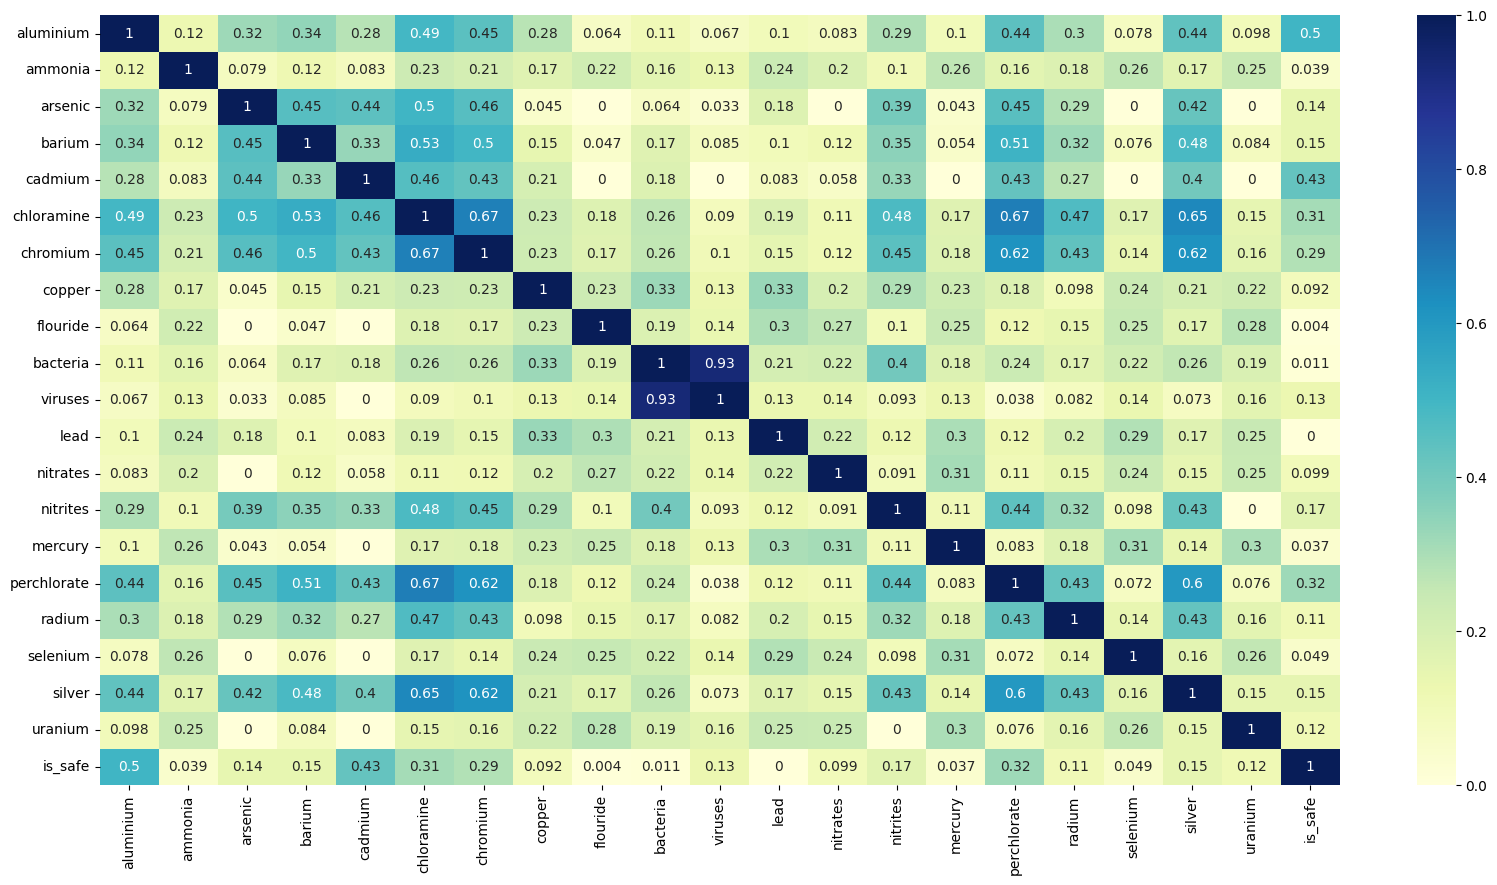

Time to run this cell: 2.161581516265869 s


In [48]:
start_time = time.time()

fig,ax = plt.subplots(figsize=[20,10])

# Correlation using Phik
corr = df_eda.phik_matrix()

# Display heatmap
ax = sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

elapsed_time = time.time() - start_time
print(f'Time to run this cell: {elapsed_time} s')

#### Bacteria & Viruses

Dapat kita lihat ada korelasi yang kuat antara bakteri dan virus yaitu sebesar `0.93` atau `93%`. Bakteri dan virus adalah dua jenis mikroorganisme yang dapat ditemukan dalam air, dan keduanya dapat menyebabkan penyakit pada manusia dan hewan. Berikut adalah beberapa poin penting tentang hubungan antara bakteri dan virus dalam air:

1. **Sumber**: Baik bakteri maupun virus dapat masuk ke dalam air melalui berbagai sumber, seperti limbah manusia atau hewan, aliran permukaan, dan langsung melalui hujan.

2. **Penyakit**: Baik bakteri maupun virus dapat menyebabkan penyakit yang ditularkan melalui air. Beberapa bakteri air, seperti Escherichia coli dan Vibrio cholerae, dapat menyebabkan penyakit seperti diare dan kolera. Demikian pula, beberapa virus air, seperti virus norovirus dan rotavirus, juga dapat menyebabkan diare dan penyakit lainnya.

3. **Penyebaran**: Baik bakteri maupun virus dapat menyebar dengan cepat dalam air, terutama jika air tersebut tidak diolah atau disaring dengan benar.

4. **Pengolahan Air**: Proses pengolahan air biasanya dirancang untuk menghilangkan atau mengurangi jumlah bakteri dan virus dalam air. Proses ini dapat mencakup filtrasi, klorinasi, ozonisasi, atau penggunaan sinar ultraviolet.

5. **Resistensi**: Beberapa bakteri dan virus dapat mengembangkan resistensi terhadap metode pengolahan air tertentu, yang dapat membuat lebih sulit untuk menghilangkan mereka dari pasokan air.

Secara keseluruhan, bakteri dan virus dalam air memiliki hubungan yang kompleks, dan pengelolaan yang tepat dari pasokan air sangat penting untuk mencegah penyebaran penyakit yang ditularkan melalui air.

Tidak masuknya bakteri dalam fitur bukan sebuah masalah karena virus masuk dalam fitur untuk mewakili bakteri juga.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5371813/#:~:text=Human%20viruses%20often%20directly%20and,amenable%20conditions%20for%20bacterial%20colonization

#### Nitrates & Nitrites

Dua senyawa tersbut memang mirip tapi tidak memiliki hubungan yang kuat karena `nitrat (NO3-)` merupakan hasil oksidasi dari `nitrit (NO2-)`, seharusnya nitrit dan nitrat memiliki hubungan negatif yang kuat jika dicek menggunakan korelasi pearson atau spearman dan tetap kuat jika dicek menggunakan korelasi phik seperti ini. Bisa jadi data yang saya gunakan kurang banyak.

Adanya nitrit dalam fitur bisa mewakili keduanya karena dua-duanya merupakan senyawa yang mirip dan cukup diwakili oleh salah satunya saja.

#### Chloramine with Silver, Chromium, & Perchlorate

Kloramin adalah disinfektan air yang dibuat dari amonia dan klorin. Ini digunakan untuk membunuh bakteri dan mikroorganisme lain misal dalam air minum dan kolam renang.

Itulah alasan kenapa kloramin memiliki hubungan yang cukup kuat dengan amonia (0.23 atau 23%).

Dalam tabel heatmap diatas, kloramin memiliki korelasi yang kuat dengan kolom-kolom berikut:

1. **Kloramin dan Perak**:
   - *Perak*: Elemen kimia logam mulia yang memiliki banyak penggunaan, mulai dari pembuatan perhiasan hingga digunakan dalam bahan konduktif elektronik. Perak juga memiliki sifat antibakteri, dan sering digunakan dalam produk antibakteri, seperti perban atau pasta gigi. Ion perak (Ag+) dapat digunakan untuk mendesinfeksi air, karena ion perak dapat membunuh bakteri dan beberapa jenis mikroorganisme lainnya.
   - *Hubungan*: Kedua zat ini, kloramin dan perak, digunakan untuk mendesinfeksi air, namun melalui mekanisme yang berbeda. Jika keduanya ada dalam sistem yang sama, bisa jadi mereka akan bersaing dalam proses desinfeksi. Selain itu, reaksi kimia antara kloramin dan ion perak dapat menghasilkan produk samping yang tidak diinginkan atau mengurangi efektivitas keduanya. Oleh karena itu, tidak disarankan untuk menggunakan keduanya secara bersamaan dalam sistem yang sama tanpa melakukan penelitian terlebih dahulu.

2. **Kloramin dan Kromium**:
   - *Kromium*: Ini adalah elemen logam yang terdapat dalam dua bentuk utama di alam: kromium(III), yang relatif tidak beracun, dan kromium(VI), yang bersifat toksik dan karsinogenik.
   - *Hubungan*: Tidak ada hubungan langsung antara kromium dan kloramin. Namun, pengolahan air yang mengandung kromium mungkin juga memerlukan desinfeksi dengan kloramin. Penggunaan kloramin dalam sistem yang mengandung kromium tidak akan menghilangkan atau mengurangi konsentrasi kromium dalam air. Jika air mengandung kromium, harus dilakukan proses pengolahan khusus untuk menghilangkan kromium sebelum atau setelah desinfeksi dengan kloramin.

3. **Kloramin dan Perklorat**:
   - *Perklorat*: Senyawa yang mengandung atom klorin yang terikat dengan empat atom oksigen. Ini adalah bahan yang sangat reaktif dan sering digunakan dalam pembuatan bahan peledak dan roket.
   - *Hubungan*: Tidak ada hubungan kimia langsung yang signifikan antara kloramin dan perklorat. Namun, jika air terkontaminasi dengan perklorat, perlu dipertimbangkan apakah penggunaan kloramin sebagai disinfektan akan menghasilkan produk samping yang tidak diinginkan atau apakah kloramin akan efektif sebagai disinfektan dalam keberadaan perklorat. Perlu dilakukan penelitian lebih lanjut untuk mengetahui interaksi ini secara pasti.

## EDA for MODEL

In [49]:
# Will use `df` for modeling EDA
df = df_eda.copy()

### OVERVIEW

#### Duplicated Data

In [50]:
df.duplicated().sum()

0

*There is no duplicated data*

#### Missing Value

In [51]:
df.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

*There is no missing values*

### Label Comparision in Target

In [52]:
df['is_safe'].value_counts()

is_safe
0    7084
1     915
Name: count, dtype: int64

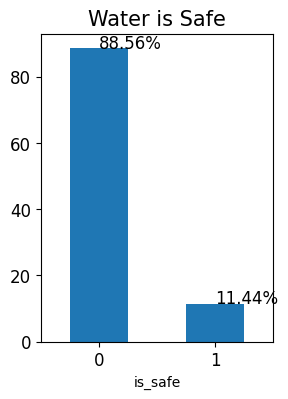

In [53]:
# Plotbar for 0 and 1 label in `is_safe`

def_count = (df.is_safe.value_counts(normalize=True)*100)
def_count.plot.bar(figsize=(3,4))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Water is Safe", fontsize=15)
for x,y in zip([0,1],def_count):
    plt.text(x, y, '{:.2f}%'.format(y), fontsize=12)
plt.show()

**`LEGENDS`**

`0` Not Safe

`1` Safe

*Highly imbalance (8:1) categorical data target, I will use `SMOTE` for balancing the data*

### Correlation Check

*I use `Phik matrix` in Heatmap to see the correlations*

interval columns not set, guessing: ['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium', 'is_safe']


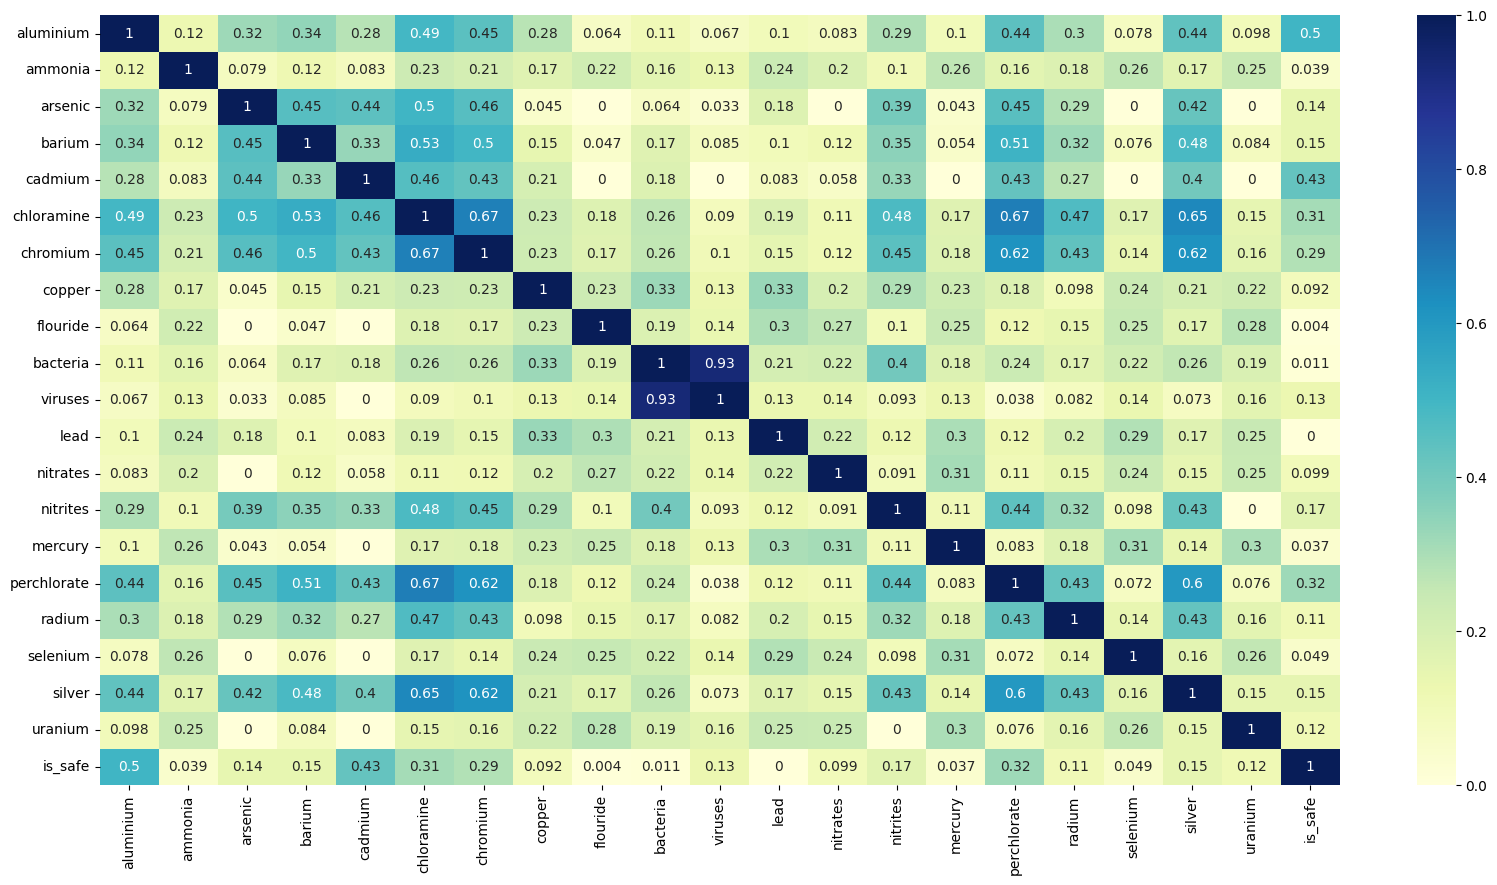

Time to run this cell: 1.976360559463501 s


In [54]:
start_time = time.time()

fig,ax = plt.subplots(figsize=[20,10])

corr = df.phik_matrix()

ax = sns.heatmap(corr,annot=True,cmap="YlGnBu")
plt.show()

elapsed_time = time.time() - start_time
print(f'Time to run this cell: {elapsed_time} s')

*The correaltion threshold for this model is `10%` or `0.1`*

*That mean the features will be:*
1. `alumunium`
2. `arsenic`
3. `barium`
4. `cadmium`
5. `chloramine`
6. `chromium`
7. `viruses`
8. `nitrites`
9. `perchlorate`
10. `radium`
11. `silver`
12. `uranium`

## FEATURE SELECTION

### Data Frame Model

In [55]:
# Data frame model will be saved in `df_model`
df_model = df.drop(columns=['ammonia','copper','flouride',
                            'bacteria','lead','nitrates',
                            'mercury','selenium'])

df_model

,aluminium,arsenic,barium,cadmium,chloramine,chromium,viruses,nitrites,perchlorate,radium,silver,uranium,is_safe
0,1.65,0.04,2.85,0.007,0.35,0.83,0.000,1.13,37.75,6.78,0.34,0.02,1
1,2.32,0.01,3.31,0.002,5.28,0.68,0.650,1.93,32.26,3.21,0.27,0.05,1
2,1.01,0.04,0.58,0.008,4.24,0.53,0.003,1.11,50.28,7.07,0.44,0.01,0
3,1.36,0.04,2.96,0.001,7.23,0.03,0.710,1.29,9.12,1.72,0.45,0.05,1
4,0.92,0.03,0.20,0.006,2.67,0.69,0.001,1.11,16.90,2.41,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,0.00,1.95,0.040,0.10,0.03,0.000,1.00,3.57,2.13,0.06,0.03,1
7995,0.05,0.02,0.59,0.010,0.45,0.02,0.000,1.00,1.48,1.11,0.10,0.08,1
7996,0.09,0.00,0.61,0.030,0.05,0.05,0.000,1.00,1.35,4.84,0.04,0.05,1
7997,0.01,0.01,2.00,0.000,2.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [56]:
print('Basic Information for Data Frame Model')
display(df_model.info())
print('Descriptive for Data Frame Model')
display(df_model.describe().T)

Basic Information for Data Frame Model
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   arsenic      7999 non-null   float64
 2   barium       7999 non-null   float64
 3   cadmium      7999 non-null   float64
 4   chloramine   7999 non-null   float64
 5   chromium     7999 non-null   float64
 6   viruses      7999 non-null   float64
 7   nitrites     7999 non-null   float64
 8   perchlorate  7999 non-null   float64
 9   radium       7999 non-null   float64
 10  silver       7999 non-null   float64
 11  uranium      7999 non-null   float64
 12  is_safe      7999 non-null   int32  
dtypes: float64(12), int32(1)
memory usage: 781.3 KB


None

Descriptive for Data Frame Model


,count,mean,std,min,25%,50%,75%,max
aluminium,7999.0,0.666158,1.265145,0.0,0.040,0.070,0.28,5.05
arsenic,7999.0,0.161445,0.252590,0.0,0.030,0.050,0.10,1.05
barium,7999.0,1.567715,1.216091,0.0,0.560,1.190,2.48,4.94
cadmium,7999.0,0.042806,0.036049,0.0,0.008,0.040,0.07,0.13
chloramine,7999.0,2.176831,2.567027,0.0,0.100,0.530,4.24,8.68
chromium,7999.0,0.247226,0.270640,0.0,0.050,0.090,0.44,0.90
viruses,7999.0,0.328583,0.378096,0.0,0.002,0.008,0.70,1.00
nitrites,7999.0,1.329961,0.573219,0.0,1.000,1.420,1.76,2.93
perchlorate,7999.0,16.460299,17.687474,0.0,2.170,7.740,29.48,60.01
radium,7999.0,2.920548,2.323009,0.0,0.820,2.410,4.67,7.99


# **V. FEATURE ENGINEERING**

## Splitting Train-Test

In [57]:
# Splitting target and feature

X = df_model.drop('is_safe',axis=1)
y = df_model['is_safe']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,
                                                 random_state = 1,
                                                 stratify=y)

### X Train

#### Outlier Handling

##### Skewness Score

In [58]:
# Skewness
skewed = []
normal_skew = []

for i in X_train:
    skew = df_model[i].skew()

    print('Skewness', i, 'is', skew)
    
    if skew >= 0.5:
        skewed.append(i)
    else:
        normal_skew.append(i)

print('SKEWED:', skewed)
print('NORMAL SKEW:', normal_skew)

Skewness aluminium is 2.014072339885798
Skewness arsenic is 1.9858509115484066
Skewness barium is 0.6613367255387429
Skewness cadmium is 0.477800107264095
Skewness chloramine is 0.8886796078760562
Skewness chromium is 1.0287277180068721
Skewness viruses is 0.4251978252302996
Skewness nitrites is -0.4985312902964583
Skewness perchlorate is 0.9382900574017039
Skewness radium is 0.5485531635707782
Skewness silver is 1.0300337155578325
Skewness uranium is -0.027110656977887594
SKEWED: ['aluminium', 'arsenic', 'barium', 'chloramine', 'chromium', 'perchlorate', 'radium', 'silver']
NORMAL SKEW: ['cadmium', 'viruses', 'nitrites', 'uranium']


*Because the majority of features are `skewed` (2 v 1), capping method that I choose is `IQR` & not Z-Score; also sacling method will be `Min Max Scaler` & not Standard Scaler*

##### Capping

*I choose capping because considering the minority of 1 (safe) category in the target and as shown in EDA, there is too many outliers and again `I dont want to lose any data`*

In [59]:
# Limits
winsorizer = Winsorizer(capping_method='iqr',
                         tail='both',
                         fold=1.5,
                         variables=skewed + normal_skew)

# Transform
X_train_capped = winsorizer.fit_transform(X_train) # fit_transform for TRAIN
X_test_capped = winsorizer.transform(X_test)       # transform for TEST

#### Scaling

*Majority of feature columns are skewed, so I choose `Min Max Scaler`*

In [60]:
scaler=MinMaxScaler()

X_train_scaled=scaler.fit_transform(X_train_capped) # fit_transform for TRAIN
X_test_scaled=scaler.transform(X_test_capped)       # transform for TEST

## Imbalance Handling

*All the feature values are numerical, it is correct to choose `SMOTE` for imbalance handling*

*SMOTENC is to handling numerical and or categorical column*

In [61]:
smote = SMOTE(random_state = 1)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)
y_train_balanced.value_counts()

is_safe
0    4959
1    4959
Name: count, dtype: int64

# **VI. MODEL DEFINITION**

## MODELS

### K-Nearest Neighbors

In [62]:
model_knn = KNeighborsClassifier()

### SVM

In [63]:
model_svm = SVC()

### Decision Tree

In [64]:
model_dt = DecisionTreeClassifier()

### Random Forest

In [65]:
model_rf = RandomForestClassifier()

### Boosting

In [66]:
model_boost = AdaBoostClassifier()

## CROSS VALIDATION

In [67]:
start_time = time.time()

# Container for all models
classifiers = [
    ('Random Forest', model_rf),
    ('Decision Tree', model_dt),
    ('Support Vector Machine', model_svm),
    ('K-Nearest Neighbors', model_knn),
    ('Boosting', model_boost)]

# Container for all scoring, I use all 4 of them to check
scoring = ['accuracy', 'precision', 'recall', 'f1']

avg_scores = {} # Container for all average score

for name, classifier in classifiers:
    pipeline = Pipeline([
        ('scaler', scaler),             # Contain MinMax Scaler
        ('smote', smote),               # Contain SMOTE
        ('classifier', classifier)])    # Contain all the models
    
    scores = cross_validate(pipeline,           # Containing all the process
                            X_train_balanced,   # Balanced features
                            y_train_balanced,   # Balanced target
                            cv=5,               # Data will be divided into 5 folds, the model will be tested 5 times
                            scoring=scoring)    # Call all scoring

    avg_scores[name] = {metric: scores[metric].mean() for metric in scores}

for index, val in avg_scores.items():
    print(index)
    print("Accuracy: {0}".format(val['test_accuracy']))
    print("Precision: {0}".format(val['test_precision']))
    print("Recall: {0}".format(val['test_recall']))
    print("F1: {0}".format(val['test_f1']))
    print("\n")

elapsed_time = time.time() - start_time
print(f'Time to run this cell: {elapsed_time} s')

Random Forest
Accuracy: 0.9673341853333983
Precision: 0.9658159226009179
Recall: 0.9689501887959378
F1: 0.9666480666763748


Decision Tree
Accuracy: 0.9405142806598018
Precision: 0.9374112086167005
Recall: 0.9439446958106833
F1: 0.9398659606636756


Support Vector Machine
Accuracy: 0.9156077668244595
Precision: 0.9137746204383944
Recall: 0.9181223755737118
F1: 0.9156831690679805


K-Nearest Neighbors
Accuracy: 0.9213551071201991
Precision: 0.8652293902212728
Recall: 0.9983870967741936
F1: 0.927019062264347


Boosting
Accuracy: 0.8925212084980398
Precision: 0.9050314401130988
Recall: 0.877601030239901
F1: 0.8893366044128002


Time to run this cell: 43.490827560424805 s


Seperti yang saya nyatakan pada bagian *`objective`* bahwa saya memilih *`recall scoring`* untuk meminimalisir *false negative* atau yang terdeteksi aman tapi nyatanya tidak.

Terlihat nilai *recall* tertinggi ada pada model `K-Nearest Neighbors`, tapi saya sudah coba semua dan mendapat nilai evaluasi tertinggi menggunakan model `Random Forest`.

Dalam model ini, saya menggunakan **`Random Forest`**

## HYPERPARAMETER TUNING

In [68]:
# start_time = time.time()

# # Pipeline
# pipeline = Pipeline([
#     ('scaler', scaler),        # Contain MinMax Scaler
#     ('smote', smote),          # Contain SMOTE
#     ('classifier', model_rf)]) # Choosed model (Random Forest)

# # Random Forest parameters
# param_grid = {
#     'classifier__n_estimators': [50, 100, 200],
#     'classifier__max_depth': [None, 10, 20],
#     'classifier__min_samples_split': [2, 5, 10],
#     'classifier__criterion': ['gini', 'entropy', 'log_loss']
# }

# # # KNN parameters
# # param_grid = {
# #     'classifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 100, 200],
# #     'classifier__weights': ['uniform', 'distance'],
# #     'classifier__p': [1, 2],
# #     'classifier__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
# #     'classifier__metric' : ['euclidean', 'manhattan', 'minkowski']
# #     }

# # StratifiedKFold
# strat_k_fold = StratifiedKFold(
#     n_splits=5,     # Data will be divided by 5 trained 5 times; each time with 4 sections (80%) for training and 1 section (20%) for testing
#     shuffle=True,   # to ensure that the data used for training and testing is representative of the entire data set
#     random_state=1)

# # Grid Search
# grid_search = GridSearchCV(pipeline,            # Contain all the steps
#                            param_grid,          # Parameters that will be search the best performed
#                            cv=strat_k_fold,     # StratifiedKFold so the output will be the same
#                            scoring='recall')    # Choosed scoring (Recall)
# grid_search.fit(X_train_balanced, y_train_balanced)

# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)

# elapsed_time = time.time() - start_time
# print(f'Time to run this cell: {elapsed_time} s')

*Seems that the best parameter for this model are:*

1. `criterion`: entropy
2. `max_depth`: 20
3. `min_samples_split`: 2
4. `n_estimators`: 200

*`Recall` score from grid search has hinger value than baseline random forest (0.9804 > 0.9679)*

***I will apply it to data train***

## ADVANTAGES & LIMITATIONS RANDOM FOREST MODEL

**`Advantages`**

1. **Akurasi Tinggi:** Random Forest merupakan salah satu model yang memiliki tingkat akurasi yang sangat tinggi karena mengkombinasikan banyak decision trees.

    ***High Accuracy:** Random Forest is one of the models with very high accuracy because it combines many decision trees.*

2. **Mengatasi Overfitting:** Dengan menggunakan multiple trees, Random Forest mengurangi risiko overfitting.

    ***Overcoming Overfitting:** By using multiple trees, Random Forest reduces the risk of overfitting.*

3. **Dapat digunakan untuk Klasifikasi dan Regresi:** Model ini bisa digunakan untuk masalah klasifikasi dan regresi.

    ***Can be used for Classification and Regression:** This model can be used for classification and regression problems.*

4. **Menghandle Missing Data:** Dapat menangani missing data dengan melakukan imputasi menggunakan median (untuk variabel kontinu) atau modus (untuk variabel kategorikal) dari data yang tidak hilang.

    ***Handles Missing Data:** It can handle missing data by imputing using the median (for continuous variables) or mode (for categorical variables) of the non-missing data.*

5. **Mampu Menangani Data Besar:** Random Forest bisa digunakan untuk dataset yang besar dan memiliki dimensi yang tinggi.

    ***Can Handle Large Data:** Random Forest can be used for large datasets and has high dimensions.*

6. **Variabel Penting:** Model ini bisa digunakan untuk identifikasi variabel yang paling berpengaruh dalam pembentukan model.

    ***Important Variables:** This model can be used to identify the most influential variables in model formation.*


**`Limitations`**

1. **Kompleksitas:** Random Forest membuat banyak pohon (ratusan atau ribuan) yang menyebabkan model menjadi sangat kompleks dan memerlukan waktu komputasi yang lebih banyak.

    ***Complexity:** Random Forest creates many trees (hundreds or thousands) which makes the model very complex and requires more computation time.*

2. **Membutuhkan Sumber Daya Komputasi Lebih:** Model ini memerlukan lebih banyak sumber daya komputasi dan memori.

    ***Requires More Computing Resources:** This model requires more computing resources and memory.*

3. **Kurang Interpretatif:** Model ini sulit untuk diinterpretasikan dibandingkan dengan decision tree karena melibatkan multiple trees.

    ***Less Interpretative:** This model is harder to interpret compared to a decision tree because it involves multiple trees.*

# **VII. MODEL TRAINING**

In [69]:
# Tuning the best parameters

# Random Forest
best_parameter = {
    'n_estimators': 200,
    'max_depth': 20,
    'min_samples_split': 2,
    'criterion':'entropy'}

# # K-Nearest Neighbors
# best_parameter = {
#     'n_neighbors': 4,
#     'p': 1,
#     'weights': 'distance',
#     'algorithm':'auto',
#     'metric':'euclidean'}

# Pipeline with the best parameters in it
pipeline = Pipeline([
    ('scaler', scaler),
    ('smote', smote),
    ('classifier', RandomForestClassifier(**best_parameter))]) #Now include best parameters for random forest

# Fit pipeline into dataset TRAIN
pipeline.fit(X_train_balanced, y_train_balanced)

# Predict into dataset TEST
y_pred = pipeline.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# **VIII. MODEL EVALUATION**

## CLASSIFICATION REPORT

In [70]:
# Show Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2125
           1       0.76      0.73      0.74       275

    accuracy                           0.94      2400
   macro avg       0.86      0.85      0.86      2400
weighted avg       0.94      0.94      0.94      2400



*`Recall`* rasio rasio perbandingan dari jumlah True Positives dibagi dengan jumlah True Positives ditambah jumlah False Negatives. *`Recall`* merepresentasikan sejauh mana model mampu mengklasifikasi semua kelas positif yang relevan.

Dari nilai *`recall`* di atas, bisa diinterpretasikan bahwa:
- Untuk kelas 0 (unsafe), model mampu mengidentifikasi 97% dari semua kasus yang sebenarnya adalah kelas 0 (unsafe).
- Untuk kelas 1 (safe), model mampu mengidentifikasi 72% dari semua kasus yang sebenarnya adalah kelas 1 (safe).

Model memiliki error 3% (100% - 97%) untuk memprediksi kelas 0 (unsafe) dan error 28% (100% - 72%) untuk memprediksi kelas 1 (safe). Berarti model lebih baik dalam mengidentifikasi air yang tidak aman dibandingkan dengan air yang aman.

## CONFUSION MATRIX

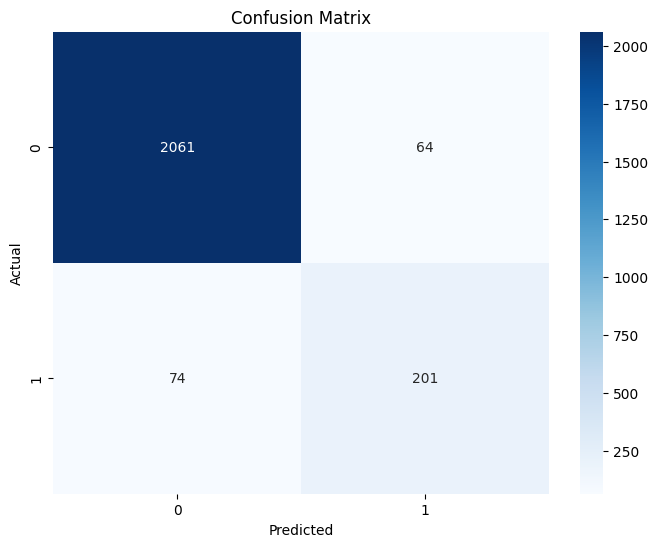

In [71]:
cm = confusion_matrix(y_test, y_pred)
class_labels = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

*`Confusion Matrix`* *show prediction*:

- True Positive: 199 data (predicted safe & actually safe)
- True Negative: 2059 data (predicted unsafe & actually unsafe)
- False Positive: 66 data (predicted unsafe but actually safe)
- False Negative: 76 data (predicted safe but actually unsafe)

*This `False Negative` class is the one that I want to minimize because it is `dangerous` if some environment water predicted to be safe but actuallt unsafe.*

*For the other part, False Positive I will ignore that because it is good if some environment water predicted to be unsafe but actually safe. Good becase that environment water will be treated by KLHK to be taken care and so they **USE OUR TAXES MONEY** (please don't tell this to them :D).*

## SCORING TRAIN-TEST

In [72]:
# Compare TRAIN-TEST prediction score (recall)

# Predict
y_pred_train = pipeline.predict(X_train_scaled) # Predict to TRAIN before SMOTE
y_pred_test = pipeline.predict(X_test_scaled)   # Predict to TEST before SMOTE

# Recall score
recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)

print(f"Recall train set: {recall_train}")
print(f"Recall test set: {recall_test}")


Recall train set: 1.0
Recall test set: 0.730909090909091


As we can see in this scoring train-test comparison, it is `obviously overfit`.

In random forest overfit case, we could do these steps:

1. Doing cross validation (**already did**)
2. Regularization by search max_depth  (**already did, but best is None**)
3. Increase parameters (**already did, use 4**)
4. Increase data

That last step is I couldn't do because I have no access to KLHK database and they don't gave me more data.

I will leave it as it is, because it has good model evaluation.

## ROC-AUC

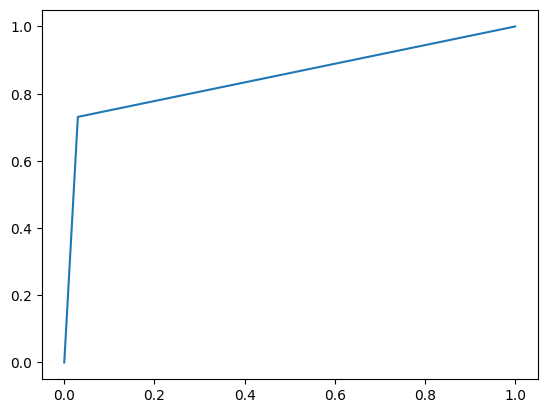

AUC: 0.8503957219251337


In [73]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.plot(fpr, tpr)
plt.show()

auc = roc_auc_score(y_test, y_pred_test)
print(f"AUC: {auc}")

Nilai AUC (*Area Under the Curve*) adalah ukuran dari performa model klasifikasi.

Nilai AUC berkisar dari 0 hingga 1. Nilai yang lebih tinggi menunjukkan bahwa model memiliki kemampuan yang lebih baik untuk membedakan antar kelas yang berbeda.

Nilai AUC disini sebesar 0.8470 & bisa diinterpretasikan "model dapat membedakan antara kelas positif dan negatif sekitar `84.70%`", yang berarti scara umum memiliki error 15.30%.

Menurut Saya ini adalah hasil yang cukup baik, karena sudah mencoba semua model dengan parameter terbaik dan ini yang menghasilkan nilai tertinggi.

## PRECISION-RECALL-AUC

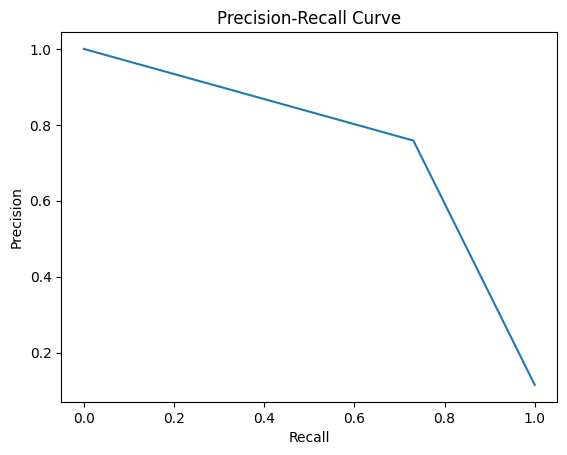

Precision-Recall AUC: 0.7601164951400801
Average Precision (AP): 0.5852209834190968


In [74]:
from sklearn.metrics import precision_recall_curve, average_precision_score, auc as sklearn_auc
import matplotlib.pyplot as plt

# Menghitung precision, recall, dan thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test)

# Plotting Precision-Recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Menghitung AUC untuk Precision-Recall dengan alias
pr_auc = sklearn_auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc}")

# Alternatif: Menggunakan average_precision_score untuk menghitung AUC
avg_precision = average_precision_score(y_test, y_pred_test)
print(f"Average Precision (AP): {avg_precision}")


Precision-Recall AUC (Area Under the Curve) dan Average Precision (AP) adalah dua metrik yang digunakan untuk mengevaluasi kinerja model pada data yang tidak seimbang, khususnya ketika kelas positif (biasanya kelas yang lebih jarang atau "minoritas") adalah fokus utama.

Nilai Precision-Recall AUC berkisar dari 0 hingga 1. Nilai yang lebih tinggi menunjukkan bahwa model memiliki kemampuan yang lebih baik untuk menyeimbangkan presisi dan recall pada data yang tidak seimbang.

Nilai Precision-Recall AUC di sini sebesar 0.7601, yang bisa diinterpretasikan sebagai "model dapat menyeimbangkan presisi dan recall dengan baik sekitar `76.01%` dari waktu", yang berarti secara umum memiliki error sekitar 23.99%.

Sementara itu, Average Precision (AP) sebesar 0.5852 menunjukkan bahwa model memiliki presisi rata-rata sekitar `58.52%` di seluruh rentang recall, dengan error sekitar 41.48%.

Menurut saya, ini adalah hasil yang cukup baik, mengingat telah mencoba berbagai model dengan parameter terbaik dan ini adalah yang menghasilkan nilai tertinggi.

# **IX. PIPELINE SAVING**

In [75]:
pipeline

Pipeline(steps=[('scaler', MinMaxScaler()), ('smote', SMOTE(random_state=1)),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', max_depth=20,
                                        n_estimators=200))])

In [76]:
with open('pipeline_yosef.pkl', 'wb') as file:
    pickle.dump((pipeline), file)

# **X. MODEL INFERENCE**

***MODEL INFERENCE WILL BE DONE IN* --- `P1M2_Yosef_Feriyanto_Inf.ipynb`**

# **XI. CONCLUSION**

## MODEL ANALYSIS

### General

* `Imbalance` category in target column made the model overfit.
* Because of that, `Oversampling SMOTE` performed in this model.
* Columns that included in feature has to have at least `0.1 correlation` with the target.
* All the feature value is in `numerical` so I just need scaling in feature engineering.

### Min Max Scaler

*Skewness Scores:*

- aluminium is 2.0141
- arsenic is 1.9859
- barium is 0.6613
- cadmium is 0.4778
- chloramine is 0.8887
- chromium is 1.0287
- viruses is 0.4252
- nitrites is -0.4985
- perchlorate is 0.9383
- radium is 0.5486
- silver is 1.0300
- uranium is -0.0271

*The majority of columns are skewed, that's why I use `Min Max Scaler`*

### Random Forest Model

*It can be seen that the highest recall value is in the `K-Nearest Neighbors` model, but I have tried everything and got the highest evaluation value using the `Random Forest` model.*

*Best Parameters:*
1. `criterion`: log_loss
2. `max_depth`: None
3. `min_samples_split`: 2
4. `n_estimators`: 200

### Confusion Matrix

- True Positive: 203 data (predicted safe & actually safe)
- True Negative: 2059 data (predicted unsafe & actually unsafe)
- False Positive: 66 data (predicted unsafe but actually safe)
- False Negative: 72 data (predicted safe but actually unsafe)

### Recall Scoring

*Scoring for this model is `Recall` because I want to minimize false negative, the one that predicted safe but actually doesn't.*

*This `False Negative` class is the one that I want to minimize because it is `dangerous` if some environment water predicted to be safe but actuallt unsafe.*

*For the other part, False Positive I will ignore that because it is good if some environment water predicted to be unsafe but actually safe. Good becase that environment water will be treated by KLHK to be taken care and so they **USE OUR TAXES MONEY** (please don't tell this to them :D).*

### Recal Score Train-Test Comparison

*As we can see in this scoring train-test comparison, it is `obviously overfit`.*

*In random forest overfit case, we could do these steps:*

1. Doing cross validation (**already did**)
2. Regularization by search max_depth  (**already did, but best is None**)
3. Increase parameters (**already did, use 4**)
4. Increase data

*That last step is I couldn't do because I have no access to KLHK database and they don't gave me more data.*

### AUC Score

The AUC value here is 0.8535 & can be interpreted as "the model can differentiate between positive and negative classes around `85.35%", which means that in general it has an error of 14.65%.

In my opinion, this is a pretty good result, because I have tried all the models with the best parameters and this is the one that produces the highest value.

## OVERALL ANALYSIS

### Distribusi Data

Sebagian besar data dari visualisasi box plot terlihat terdistribusi dengan normal kecuali pada kolom alumunium, arsenic, cadmium, & nitrites yang masing-masing memiliki banya outlier.

### Korelasi

#### Bacteria & Viruses

Bakteri dan virus memiliki hubungan yang kompleks dan pengolahan yang tepat harus dilakukan untuk mencegah oenyebaran keduanya.

#### Nitrates & Nitrites

Nitrat merupakan hasil oksidasi dari Nitrit dan kedua senyawa ini seharusnya memiliki hubungan kuat yang negatif karena semakin banyak nitrat dalam suatu lingkungan berarti semakin sedikit nitritnya.

#### Chloramine with Silver, Chromium, & Perchlorate

* Chloramine & Silver

    Kloramin dan perak digunakan untuk mendesinfeksi air dan bisa mengahsilnya produk samping atau sisa senyawanya.

* Chloramine & Chromium

    Terkadang proses pengolahan air memerlukan kromium tetapi butuh prose pengolahan khusus lanjutan setelahnya.

* Chloramine & Perchlorate

    Perklorat merupakan senyawa yang biasanya digunakan sebagai bahan peledak, tingginya korelasi keduanya bisa karena kloramin digunakan untuk menghilangkan kadar perklorat.

## BUSINESS STRATEGY

1. Scoring yang digunakan adaah `Recall` untuk meminimalisir false negative atau yang terdeteksi aman tetapi sebenarnya tidak aman.

2. Perlu investigasi tambahan untuk lingkungan air yang memiliki kadar `perklorat tinggi`, apakah itu sisa bahan peledak dari perang atau petasan.

3. Data kementerian untuk analisa apakah perairan aman atau tidak perlu ditambah parameter,
    * `Fisika`: Temperatur (Celcius), Residu terlarut & tersuspensi (mg/L)
    * `Kimia Anorganik`: Keasaman (pH), BOD, COD, DO, Total Phosphate, Besi, Mangan, Raksa, & Belerang.
    * `Kimia Organik`: Minyak, Detergen, Fenol, BHC, DDT, Aldrin, & Heptachlor epoksida.
    * `Mikrobiologi`: Coliform
    * `Raioaktivitas`: Gross-A & Gross-B

https://www.universaleco.id/blog/detail/parameter-pencemaran-lingkungan/15

`Penjelasan Singkat`

`BOD` (Biological Oxygen Demand): Ukuran oksigen yang dibutuhkan mikroorganisme untuk mengurai bahan organik dalam sampel air.

`COD` (Chemical Oxygen Demand): Ukuran total oksigen yang dibutuhkan untuk mengoksidasi semua bahan organik dan anorganik dalam sampel air dengan menggunakan agen pengoksidasi kimia.

`DO` (Dissolved Oxygen): Jumlah oksigen yang terlarut dalam air, penting untuk kehidupan ikan dan organisme air lainnya.

`Fenol`: Senyawa organik yang terdapat dalam air limbah industri dan dapat menyebabkan bau dan rasa yang tidak enak pada air.

`BHC` (Benzena Heksaklorida): Pestisida organoklorin yang beracun dan persisten dalam lingkungan.

`DDT` (Diklorodifeniltrikloretana): Pestisida organoklorin yang beracun dan persisten dalam lingkungan.

`Aldrin`: Pestisida organoklorin yang sangat beracun dan persisten dalam lingkungan.

`Heptachlor epoksida`: Metabolit dari pestisida heptachlor, merupakan bahan kimia yang sangat beracun dan persisten dalam lingkungan.

`Coliform`: Bakteri yang umumnya ditemukan dalam tinja manusia atau hewan, digunakan sebagai indikator kontaminasi feses dalam air.

`Gross-A` dan `Gross-B`: Istilah yang digunakan untuk menggambarkan dua jenis radioaktivitas alfa dan beta yang terdapat dalam air. Gross-A mengukur total radioaktivitas alfa dan Gross-B mengukur total radioaktivitas beta.

# **XII. CONCEPTUAL PROBLEM (ANSWER)**

1. **`Jelaskan latar belakang adanya bagging dan cara kerja bagging!`**

    *`Bagging`* merupakan singkatan dari *Bootstrap Aggregating*.
    
    *Bagging* adalah teknik yang dilakukan untuk mengurangi variansi dari model seperti *decision trees*. Model *decision trees* sering memiliki variansi yang tinggi, yaitu model dapat menghasilkan prediksi yang sangat berbeda jauh ketika ada perubahan kecil saja pada *input*. *Bagging* bertugas mengurangi variansi ini dengan membuat banyak versi dari model asli dan menggabungkan mereka untuk menghasilkan prediksi yang lebih kuat dan stabil.

    Cara kerja *bagging* dengan membuat beberapa sampel *bootstrap* dari data atau sampel dengan penggantian. Kemudian, model yang sama di-*fit* ke setiap sampel *bootstrap* dan hasil prediksi dari semua model tersebut digabungkan untuk menghasilkan prediksi akhir. Penggabungan prediksi ini bisa dilakukan dengan cara mengambil rerata (untuk regresi) atau voting (untuk klasifikasi).

2. **`Jelaskan perbedaan cara kerja algoritma` *`Random Forest`* `dengan algoritma boosting yang Anda pilih!`**

    *`Random Forest`* merupakan sebuah algoritma *bagging* yang memanfaatkan model *decision trees* sebagai model inti. *Random Forest* akan menghasilkan beberapa *decision trees* yang tidak saling berhubungan lalu mengkombinasikan hasil dari setiap pohon keputusan untuk menghasilkan prediksi akhir.

    *`Boosting`* adalah metode yang digunakan untuk membentuk model prediksi yang lebih kuat dengan menggabungkan beberapa atau satu tapi banyak jumlah model prediksi yang lebih lemah. *Boosting* bekerja dengan membuat model secara bertahap, lalu setiap model akan mengoreksi kesalahan yang dibuat oleh model sebelumnya. Boosting yang terkenal dan umum digunakan adalah AdaBoost dan Gradient Boosting.

    Perbedaan antara *Random Forest* dan *Boosting* adalah:

    *Random Forest* menghasilkan semua model secara mandiri dan mengkombinasikan hasilnya, sedangkan *boosting* menghasilkan model secara berurutan, dengan setiap model akan mengoreksi kesalahan yang dibuat oleh model sebelumnya.
    
    *Random Forest* merupakan teknik bagging, sedangkan semua *Boosting* merupakan teknik boosting.

    Saya memilih metode `AdaBoostingClassifier` karena umum digunakan.

3. **`Jelaskan apa yang dimaksud dengan` *`Cross Validation`*`!`**

    *Cross Validation* adalah langkah yang dilakukan untuk mengukur kinerja model pada data. *Cross Validation* berguna untuk menghindari *overfitting* atau ketika model terlalu kompleks dan menangkap noise dalam data sebagai pola, seperti pada model ini karena data kategori 1 jauh lebih sedikit daripada kategori 0 (perbandingan 1:8).

    Cara kerja *Cross Validation* adalah membagi data menjadi beberapa subset atau bagian yang disebut dengan *`fold`*. Kemudian, model di-*fit* pada beberapa *fold* dan diuji pada *fold* lain yang tidak digunakan untuk *fitting*. Lalu proses ini diulang beberapa kali sesuai ketentuan yang diminta, pada model ini saya menggunakan 5 kali *fold*. Hasil dari semua iterasi ini digabungkan untuk menghasilkan estimasi kinerja masing-masing model pada data.